In [12]:
# Import thư viện 
import pandas as pd
import seaborn as sb
import matplotlib as mp
import matplotlib.pyplot as plt
import numpy as np

In [3]:

df = pd.read_csv('sales_data_sample.csv')
df.head()

,ORDERNUMBER,QUANTITYORDERED,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,COUNTRY,DEALSIZE
0,10107,30,2,2871.00,2/24/2003 0:00,Shipped,USA,Small
1,10121,34,5,2765.90,5/7/2003 0:00,Shipped,France,Small
2,10134,41,2,3884.34,7/1/2003 0:00,Shipped,France,Medium
3,10145,45,6,3746.70,8/25/2003 0:00,Shipped,USA,Medium
4,10159,49,14,5205.27,10/10/2003 0:00,Shipped,USA,Medium


In [4]:
# Câu 1: Nếu sử dụng Max Absolute Scaler cho SALES thì giá trị có index = 100 được scale thành bao nhiêu
maxsales = df['SALES'].max()
max100 = df.loc[100 , 'SALES']

MaxAbsolute = max100 / maxsales 

MaxAbsolute

0.21232496378561083

In [6]:
#3.  Có mối liên hệ nào giữa trạng thái giao hàng và giá trị đặt hàng hay không
from scipy.stats import chi2_contingency


crosdata = pd.crosstab(df['STATUS'], [df['QUANTITYORDERED']], rownames=['STATUS'], colnames=['QUANTITYORDERED'])

stat, p, dof, expected = chi2_contingency(crosdata)
 
# interpret p-value
alpha = 0.05
print("p value is " + str(p))


# => có phụ thuộc

p value is 8.302151811554312e-187


In [7]:
# 4. Nếu sử dụng One Hot Encoding để số hóa dữ liệu DEALSIZE thì kết quả của dòng cuối cùng là bao nhiêu
from sklearn.preprocessing import LabelBinarizer

y = LabelBinarizer().fit_transform(df.DEALSIZE) # giúp tạo ra matrix vector
y[-1]


array([0, 1, 0])

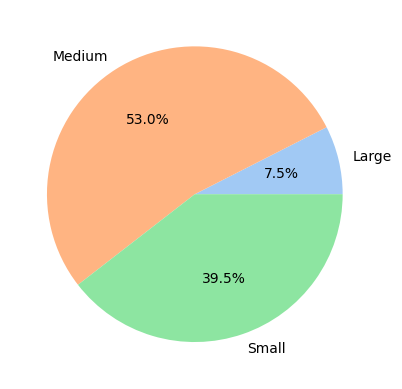

In [8]:
# 5.Hãy cho biết phần trăm số lượng sản phẩm theo kích thước đặt hàng
# Import thư viện 
import pandas as pd
import seaborn as sb
import matplotlib as mp
import matplotlib.pyplot as plt

gb = df.groupby(['DEALSIZE']) ['QUANTITYORDERED'].agg(['sum'])
labels = gb.index
data =  list(gb['sum'])
color = sb.color_palette('pastel')
plt.pie(data, labels = labels , colors=color, autopct= '%1.1f%%', shadow= False)

plt.show()

In [9]:
# 6.Hãy cho biết thứ tự mức độ ổn định tăng dần của giá trị bán hàng trên từng nhóm kích thước đặt hàng
# Nhóm dữ liệu theo kích thước đặt hàng và tính trung bình giá trị bán hàng trong mỗi nhóm
average_sales_by_dealsize = df.groupby('DEALSIZE')['SALES'].mean()

# Sắp xếp dữ liệu theo giá trị trung bình tăng dần
sorted_sales_by_dealsize = average_sales_by_dealsize.sort_values()

# Hiển thị thứ tự ổn định tăng dần của giá trị bán hàng trên từng nhóm kích thước đặt hàng
print(sorted_sales_by_dealsize)

DEALSIZE
Small     2061.682800
Medium    4398.433699
Large     8293.753248
Name: SALES, dtype: float64


In [10]:
# 7.Hãy cho biết độ lệch của giá trị đặt hàng của các sản phẩm
from scipy.stats import skew

h = df['SALES']
skew(h)

1.160458972499323

In [20]:
df['sales_transform1'] = 1 / (np.log(df['SALES'])*np.log(df['SALES']) + 1)
h=df['sales_transform1']
n=skew(h)
print('độ lệch câu 7 ',n)
df['sales_transform2'] = np.sqrt(df['sales_transform1'])
p=df['sales_transform2']
t = skew(p)

print('độ lệch câu 6 ',t)



độ lệch câu 7  0.7675895261439601
độ lệch câu 6  0.5659624607534838


In [19]:
sales_log = np.log(df['SALES']).skew()

sales_sqrt = np.sqrt(df['SALES']).skew()

sales_square = np.square(df['SALES']).skew()

sales_cube = np.cbrt(df['SALES']).skew()

print('sales_log : ', sales_log)
print('sales_sqrt : ', sales_sqrt)
print('sales_square : ', sales_square)
print('sales_cube : ', sales_cube)

sales_log :  -0.2021742362869817
sales_sqrt :  0.47281500087876144
sales_square :  2.915766495908139
sales_cube :  0.25086487312083416


In [22]:
sales= skew((df['SALES']))
print('sales_cube : ', sales)


sales_cube :  1.160458972499323


(array([462., 965., 713., 370., 190.,  79.,  28.,   9.,   6.,   1.]),
 array([  482.13 ,  1842.197,  3202.264,  4562.331,  5922.398,  7282.465,
         8642.532, 10002.599, 11362.666, 12722.733, 14082.8  ]),
 <BarContainer object of 10 artists>)

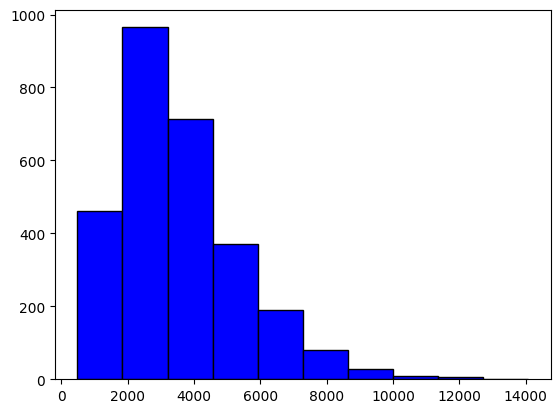

In [28]:
plt.hist(df['SALES'], bins=10, color='blue', edgecolor='black')
